<a href="https://colab.research.google.com/github/zlibutmatthew/Stock-Prediction-SVM/blob/master/SVM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

#Get the stock info and store into a dataframe
df = web.DataReader('AAPL', data_source='yahoo', start='2008-01-01', end='2019-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,6.013175
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,6.015953
2008-01-04,6.892857,6.388928,6.837500,6.430357,1.455832e+09,5.556723
2008-01-07,6.557143,6.079643,6.473214,6.344285,2.072193e+09,5.482346
2008-01-08,6.516428,6.100000,6.433571,6.116071,1.523816e+09,5.285137
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,4.847880e+07,70.580566
2019-12-26,72.495003,71.175003,71.205002,72.477501,9.312120e+07,71.980911
2019-12-27,73.492500,72.029999,72.779999,72.449997,1.462660e+08,71.953598


In [5]:
df.shape

(3021, 6)

Text(0, 0.5, 'Stock Close Price')

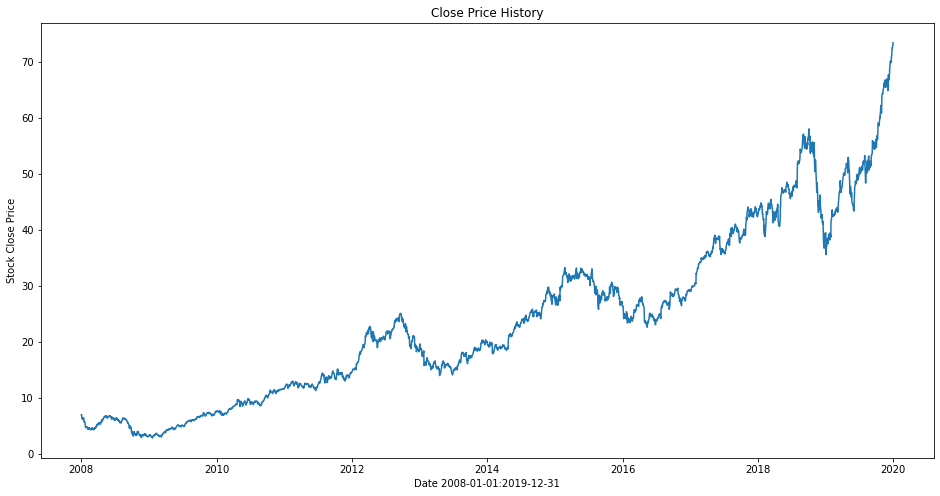

In [6]:
#Visualize the closing prince of the Apple stock.
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date 2008-01-01:2019-12-31')
plt.ylabel('Stock Close Price')

In [7]:
#prepare data for model
df1 = df.reset_index()
df1['day_count'] = range(0,len(df1))
# df1

#create list of independent(date) and dependent(adj close price) data
days= []
adj_close_prices = []
df_days = df1.loc[:,'day_count']
df_adj_close = df1.loc[:, 'Adj Close']

for i in df_days:
  days.append([i])
for c in df_adj_close:
  adj_close_prices.append(float(c))

#make a smaller data set so the runtime is lower
test_day = days[0:40]
test_close = adj_close_prices[0:40]
print(test_day)
print(test_close)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39]]
[6.013175010681152, 6.015953063964844, 5.556723117828369, 5.4823455810546875, 5.285136699676514, 5.536662578582764, 5.494073867797852, 5.329577922821045, 5.5175275802612305, 5.2169318199157715, 4.926827430725098, 4.965404987335205, 4.9799113273620605, 4.803378105163574, 4.291995048522949, 4.184902667999268, 4.012383460998535, 4.012383460998535, 4.059603691101074, 4.079355239868164, 4.177495956420898, 4.127808570861816, 4.0629963874816895, 3.992323160171509, 3.7651779651641846, 3.741722345352173, 3.872577667236328, 3.995100736618042, 3.8534433841705322, 3.993555784225464, 3.9336845874786377, 3.8463451862335205, 3.770732879638672, 3.821348190307617, 3.7509806156158447, 3.68678879737854, 3.695429801940918, 3.6772210597991943, 3.7948062419891357, 4.00929784774780

In [8]:
#set up model

#linear kernel
lin_svr = SVR(kernel='linear', C=1000)
lin_svr.fit(test_day, test_close)

# #polynomial kernel
poly_svr = SVR(kernel='poly', degree = 2)
poly_svr.fit(test_day, test_close)

# #rbf kernel
rbf_svr = SVR(kernel='rbf', gamma=0.15)
rbf_svr.fit(test_day, test_close)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

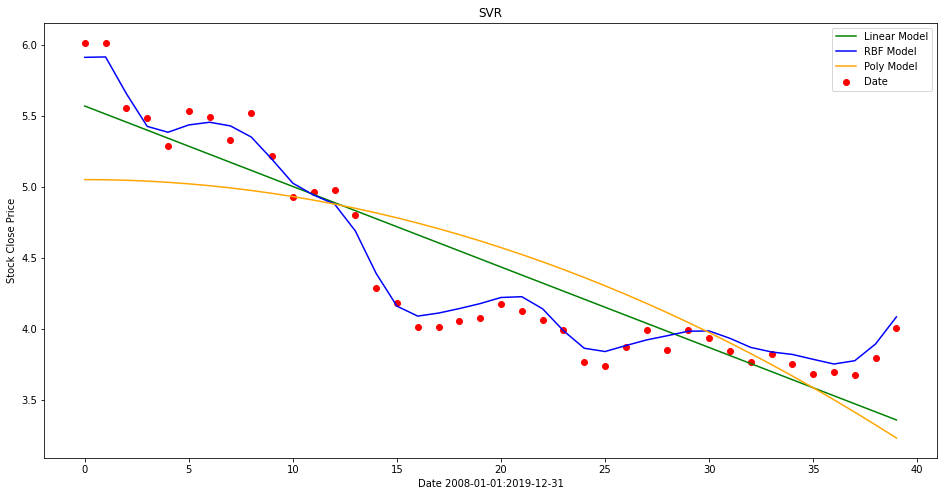

In [9]:
plt.figure(figsize=(16,8))
plt.title('SVR')
plt.scatter(test_day, test_close, color='red',label='Date')
plt.plot(test_day, lin_svr.predict(test_day), color='green', label='Linear Model')
plt.plot(test_day, rbf_svr.predict(test_day), color='blue', label='RBF Model')
plt.plot(test_day, poly_svr.predict(test_day), color='orange', label='Poly Model')
plt.xlabel('Date 2008-01-01:2019-12-31')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()

In [10]:
#creating a new dataframe with the close column
close_data=df.filter(['Close'])
#convert to np array
close_df = close_data.values
#number of rows to train the model on
train_len = int(len(close_df)*.8)
#train_len = 2416

In [11]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_df)
scaled_data

array([[0.05898804],
       [0.05903356],
       [0.05150833],
       ...,
       [0.98637063],
       [0.99245959],
       [1.        ]])

In [12]:
#create training dataset
train_data = scaled_data[0:train_len,:]
train_days= days[0:2416]
# #split between x_train and y_train
# x_train = []
# y_train = []
# for i in range(60, len(train_data)):
#   x_train.append(train_data[i-60:i,0])
#   y_train.append(train_data[i,0])

# #convert x_train and y_train to np.arrays
# x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
#linear kernel
lin_svr = SVR(kernel='linear', C=0.05)
lin_svr.fit(train_days, train_data)

#polynomial kernel
poly_svr = SVR(kernel='poly', degree = 2)
poly_svr.fit(train_days, train_data)

#rbf kernel
rbf_svr = SVR(kernel='rbf', gamma=0.15)
rbf_svr.fit(train_days, train_data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

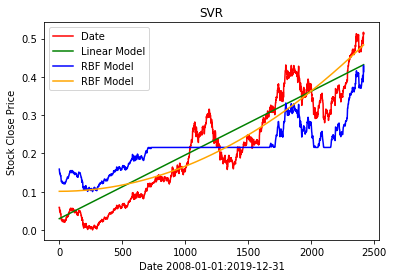

In [25]:
plt.title('SVR')
plt.plot(train_days, train_data, color='red',label='Date')
plt.plot(train_days, lin_svr.predict(train_days), color='green', label='Linear Model')
plt.plot(train_days, rbf_svr.predict(train_days), color='blue', label='RBF Model')
plt.plot(train_days, poly_svr.predict(train_days), color='orange', label='RBF Model')
plt.xlabel('Date 2008-01-01:2019-12-31')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()